# Sigmoid

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    sigma = sigmoid(x)
    return sigma * (1 - sigma)

# Generate x values from -10 to 10 with 400 points
x = np.linspace(-10, 10, 400)

# Compute the sigmoid and its derivative
sigma = sigmoid(x)
sigma_derivative = sigmoid_derivative(x)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the sigmoid function
plt.subplot(1, 2, 1)
plt.plot(x, sigma, label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()

# Plot the derivative of the sigmoid function
plt.subplot(1, 2, 2)
plt.plot(x, sigma_derivative, label="Sigmoid Derivative", color='red')
plt.title("Sigmoid Derivative")
plt.xlabel('x')
plt.ylabel('σ\'(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Images/sigmoid_and_derivative.png')
plt.show()

# Tanh

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tanh function
def tanh(x):
    return np.tanh(x)

# Define the derivative of the tanh function
def tanh_derivative(x):
    return 1 - tanh(x)**2

# Generate x values from -10 to 10 with 400 points
x = np.linspace(-10, 10, 400)

# Compute the tanh and its derivative
tanh_values = tanh(x)
tanh_derivative_values = tanh_derivative(x)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the tanh function
plt.subplot(1, 2, 1)
plt.plot(x, tanh_values, label='tanh(x)', color='blue')
plt.title('Hyperbolic Tangent (tanh)')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()

# Plot the derivative of the tanh function
plt.subplot(1, 2, 2)
plt.plot(x, tanh_derivative_values, label="tanh'(x)", color='red')
plt.title("Derivative of tanh")
plt.xlabel('x')
plt.ylabel("tanh'(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()

# Save the plot as an image
plt.tight_layout()
plt.savefig('Images/tanh_and_derivative.png')  # Save as PNG
plt.show()

# Leaky ReLU

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
alpha = 0.01  # Leaky ReLU slope for negative values
x = np.linspace(-5, 5, 1000)  # Generate 1000 points from -5 to 5
y = np.where(x > 0, x, alpha * x)  # Apply Leaky ReLU

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue', linewidth=2, label=f'Leaky ReLU (α = {alpha})')

# Customize the plot
plt.title('Leaky ReLU Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (f(x))')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.ylim(-0.1, 5.1)  # Set y-axis limits for better visibility
plt.legend()
plt.tight_layout()

# Display the plot
plt.savefig('Images/LeakyReLU.svg') 
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the models
class CNNReLU(nn.Module):
    def __init__(self):
        super(CNNReLU, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

class CNELU(nn.Module):
    def __init__(self):
        super(CNELU, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ELU(0.1),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ELU(0.1),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training function with loss tracking
def train(model, epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    losses = []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        losses.append(epoch_loss)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss}")
    return losses

# Train both models
model_relu = CNNReLU()
model_elu = CNELU()

print("Training ReLU Model...")
losses_relu = train(model_relu)

print("Training ELU Model...")
losses_elu = train(model_elu)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(losses_relu, label='ReLU', marker='o')
plt.plot(losses_elu, label='ELU', marker='s')
plt.title('Training Loss Comparison: ReLU vs ELU')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('Images/CNNELUvsReLUalpha02.svg') 
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the MLP models with ReLU and ELU activation functions
class MLPReLU(nn.Module):
    def __init__(self):
        super(MLPReLU, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )
    
    def forward(self, x):
        return self.layers(x)

class MLPELU(nn.Module):
    def __init__(self):
        super(MLPELU, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 512),
            nn.ELU(0.1),
            nn.Linear(512, 256),
            nn.ELU(0.1),
            nn.Linear(256, 10)
        )
    
    def forward(self, x):
        return self.layers(x)

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training function with loss tracking
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    losses = []
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            # Flatten the input images
            images = images.view(images.size(0), -1)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        # Average loss per epoch
        avg_loss = total_loss / len(train_loader)
        losses.append(avg_loss)
    
    return losses

# Initialize models, loss function, and optimizers
model_relu = MLPReLU()
model_elu = MLPELU()

criterion = nn.CrossEntropyLoss()
optimizer_relu = optim.Adam(model_relu.parameters(), lr=0.001)
optimizer_elu = optim.Adam(model_elu.parameters(), lr=0.001)

# Train both models
print("Training ReLU model...")
losses_relu = train_model(model_relu, train_loader, criterion, optimizer_relu, epochs=10)

print("Training ELU model...")
losses_elu = train_model(model_elu, train_loader, criterion, optimizer_elu, epochs=10)

# Plot the training loss curves
plt.figure(figsize=(10, 5))
plt.plot(losses_relu, label='ReLU', marker='o')
plt.plot(losses_elu, label='ELU', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison: ReLU vs ELU')
plt.legend()
plt.grid(True)
plt.savefig('Images/MLPELUvsReLUalpha02.svg') 
plt.show()

# SELU

Training ReLU Model...
Epoch 1, Loss: 0.20989655634102378
Epoch 2, Loss: 0.05933437210473933
Epoch 3, Loss: 0.04392513395264757
Epoch 4, Loss: 0.03697964029843613
Epoch 5, Loss: 0.029533432235402404
Epoch 6, Loss: 0.025344734443809594
Epoch 7, Loss: 0.02071720398402761
Epoch 8, Loss: 0.018818849056835292
Epoch 9, Loss: 0.016252354649917918
Epoch 10, Loss: 0.013481508282038432
Epoch 11, Loss: 0.012075319493658808
Epoch 12, Loss: 0.00958379049038711
Epoch 13, Loss: 0.00931707379009601
Epoch 14, Loss: 0.007873461875404436
Epoch 15, Loss: 0.008020428206485049
Epoch 16, Loss: 0.0070854965579040035
Epoch 17, Loss: 0.004724071867901654
Epoch 18, Loss: 0.0063444876872328585
Epoch 19, Loss: 0.0061805963977463576
Epoch 20, Loss: 0.004188882283271612
Epoch 21, Loss: 0.0041174326056701745
Epoch 22, Loss: 0.0028280779720114956
Epoch 23, Loss: 0.003746410084864522
Epoch 24, Loss: 0.0020557839087508877
Epoch 25, Loss: 0.005930906792359996
Epoch 26, Loss: 0.001890599772032052
Epoch 27, Loss: 0.0029889

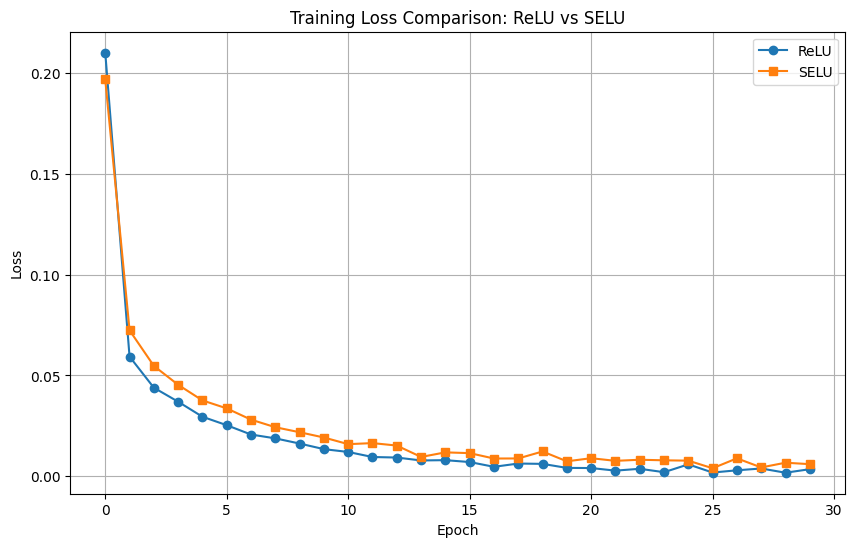

In [4]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

def init_selu(m):
    if isinstance(m, nn.Conv2d):
        n = m.in_channels * m.kernel_size[0] * m.kernel_size[1]
        std = 1.0 / math.sqrt(n)
        nn.init.normal_(m.weight, mean=0, std=std)
        if m.bias is not None:
            nn.init.zeros_(m.bias)
    elif isinstance(m, nn.Linear):
        n = m.in_features
        std = 1.0 / math.sqrt(n)
        nn.init.normal_(m.weight, mean=0, std=std)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# Define the models
class CNNReLU(nn.Module):
    def __init__(self):
        super(CNNReLU, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

class CNSELU(nn.Module):
    def __init__(self):
        super(CNSELU, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.SELU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.SELU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training function with loss tracking
def train(model, epochs= 30):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    losses = []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        losses.append(epoch_loss)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss}")
    return losses

# Train both models
model_relu = CNNReLU()
model_selu = CNSELU()
model_selu.apply(init_selu)


print("Training ReLU Model...")
losses_relu = train(model_relu)

print("Training SELU Model...")
losses_elu = train(model_selu)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(losses_relu, label='ReLU', marker='o')
plt.plot(losses_elu, label='SELU', marker='s')
plt.title('Training Loss Comparison: ReLU vs SELU')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('Images/CNNSELUvsReLUalpha02.svg') 
plt.show()

# Fully connected SELU

Epoch 1/10, Train Loss: 0.2448, Val Loss: 0.1324, Val Precision: 0.9603
Epoch 2/10, Train Loss: 0.1413, Val Loss: 0.1559, Val Precision: 0.9565
Epoch 3/10, Train Loss: 0.1259, Val Loss: 0.1496, Val Precision: 0.9607
Epoch 4/10, Train Loss: 0.1083, Val Loss: 0.1751, Val Precision: 0.9556
Epoch 5/10, Train Loss: 0.1005, Val Loss: 0.1462, Val Precision: 0.9620
Epoch 6/10, Train Loss: 0.0933, Val Loss: 0.1331, Val Precision: 0.9660
Epoch 7/10, Train Loss: 0.0862, Val Loss: 0.1438, Val Precision: 0.9660
Epoch 8/10, Train Loss: 0.0840, Val Loss: 0.1473, Val Precision: 0.9665
Epoch 9/10, Train Loss: 0.0808, Val Loss: 0.1273, Val Precision: 0.9706
Epoch 10/10, Train Loss: 0.0713, Val Loss: 0.1461, Val Precision: 0.9657
Epoch 1/10, Train Loss: 0.2837, Val Loss: 0.2589, Val Precision: 0.9347
Epoch 2/10, Train Loss: 0.2025, Val Loss: 0.1828, Val Precision: 0.9556
Epoch 3/10, Train Loss: 0.1653, Val Loss: 0.1881, Val Precision: 0.9553
Epoch 4/10, Train Loss: 0.1528, Val Loss: 0.1623, Val Precision

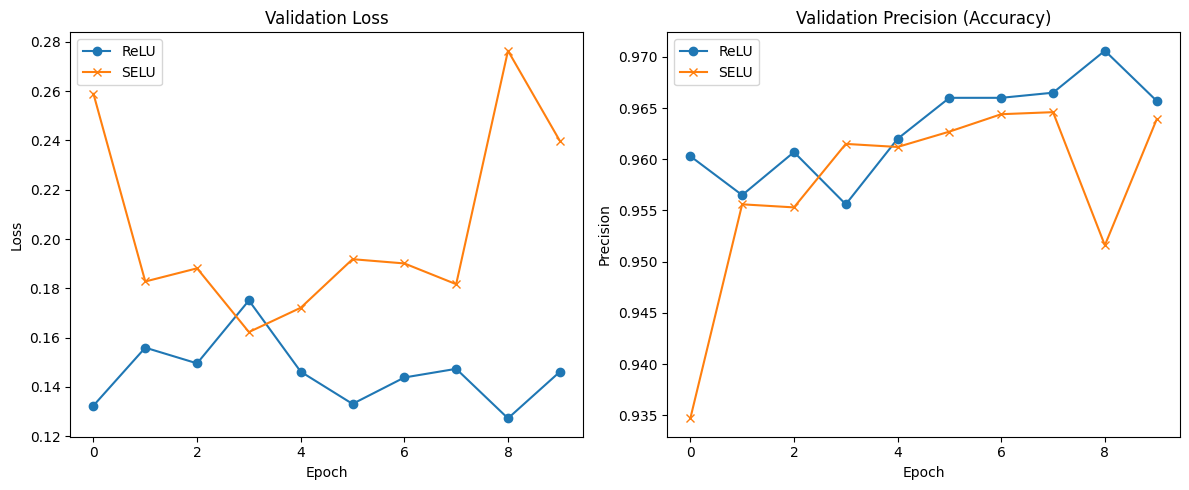

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 1. Define the MLP model with ReLU or SELU
class MLP(nn.Module):
    def __init__(self, activation='relu'):
        super(MLP, self).__init__()
        self.activation = activation
        self.layers = nn.Sequential(
            nn.Linear(784, 128),
            self.get_activation(),
            nn.Linear(128, 64),
            self.get_activation(),
            nn.Linear(64, 10)
        )
        self.init_weights()

    def get_activation(self):
        if self.activation == 'relu':
            return nn.ReLU()
        elif self.activation == 'selu':
            return nn.SELU()
        else:
            raise ValueError("Unknown activation")

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                if self.activation == 'selu':
                    # SELU: LeCun initialization (kaiming_normal with nonlinearity='linear')
                    nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='linear')
                else:
                    # ReLU: He initialization (kaiming_normal with nonlinearity='relu')
                    nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                nn.init.zeros_(m.bias)  # Bias initialization

    def forward(self, x):
        return self.layers(x)

# 2. Load MNIST data
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 3. Training function
def train_model(model, train_loader, test_loader, epochs=10, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_loss_history = []
    val_loss_history = []
    val_precision_history = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.view(images.size(0), -1)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_precision = correct / total
        val_loss /= len(test_loader)
        train_loss /= len(train_loader)
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)
        val_precision_history.append(val_precision)
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Precision: {val_precision:.4f}')
    return train_loss_history, val_loss_history, val_precision_history

# 4. Train models
model_relu = MLP(activation='relu')
model_selu = MLP(activation='selu')

train_loss_relu, val_loss_relu, val_precision_relu = train_model(model_relu, train_loader, test_loader, epochs=10)
train_loss_selu, val_loss_selu, val_precision_selu = train_model(model_selu, train_loader, test_loader, epochs=10)

# 5. Plot results
plt.figure(figsize=(12, 5))

# Validation Loss
plt.subplot(1, 2, 1)
plt.plot(val_loss_relu, label='ReLU', marker='o')
plt.plot(val_loss_selu, label='SELU', marker='x')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Validation Precision
plt.subplot(1, 2, 2)
plt.plot(val_precision_relu, label='ReLU', marker='o')
plt.plot(val_precision_selu, label='SELU', marker='x')
plt.title('Validation Precision (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.savefig('Images/DenseSELUvsReLU.svg') 
plt.show()